In [72]:
import pandas as pd

data = pd.read_csv("PremierLeague.csv")

In [73]:
# Check for missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 14 columns):
Unnamed: 0           6926 non-null int64
home_team            6926 non-null object
away_team            6926 non-null object
date                 6926 non-null object
home_goals           6926 non-null int64
away_goals           6926 non-null int64
referee              6926 non-null object
home_fouls           6926 non-null int64
away_fouls           6926 non-null int64
home_yellow_cards    6926 non-null int64
away_yellow_cards    6926 non-null int64
home_red_cards       6926 non-null int64
away_red_cards       6926 non-null int64
season               6926 non-null int64
dtypes: int64(10), object(4)
memory usage: 757.6+ KB


In [8]:
data.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'date', 'home_goals',
       'away_goals', 'referee', 'home_fouls', 'away_fouls',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards', 'season'],
      dtype='object')

1. For each season which team(s) committed the most fouls?

Relevant columns: home_fouls, away_fouls, home_team, away_team, season


In [83]:
# Investigate relevant columns - Season, games missing from 02/03, 03/04, 04/05 data and current season is incomplete

data.season.value_counts()

102     380
1516    380
1011    380
607     380
708     380
1718    380
1314    380
910     380
506     380
1415    380
1617    380
1213    380
809     380
1112    380
1       380
304     335
405     335
203     316
1819    240
Name: season, dtype: int64

In [10]:
# Home fouls - looks reasonable, no strange values

data.home_fouls.value_counts()

11    751
12    730
10    707
9     645
13    617
14    546
8     526
15    408
7     404
6     340
16    306
17    237
5     161
18    153
19    114
20     67
4      63
22     32
21     31
3      22
23     18
2      15
24     12
25      9
26      5
28      3
27      1
1       1
33      1
0       1
Name: home_fouls, dtype: int64

In [11]:
# Away fouls - all fall within acceptable range

data.away_fouls.value_counts()

11    705
10    684
12    681
13    678
9     584
14    552
15    482
8     463
16    381
7     350
17    276
6     222
18    190
5     141
19    136
20    102
21     89
4      55
22     43
3      34
23     27
24     16
26     10
25      7
2       6
1       5
27      3
28      3
29      1
Name: away_fouls, dtype: int64

In [18]:
# Home and away team values are the same

home = data.home_team.values.tolist()
away = data.home_team.values.tolist()

home == away

True

In [84]:
# Perform a groupby on the data. Groupby season, apply function that loops through all teams and sums their\
# home and away fouls and divides by the number of games they played so we can compare seasons equally

In [74]:
grouped = data.groupby('season')

In [79]:
def foul_count(season):
    
    fouls = {}
    
    teams = season['home_team']
    for team in teams:
        
        home_games = season[season['home_team']==team]
        away_games = season[season['away_team']==team]
        
        games = len(home_games) + len(away_games)
        
        home_fouls = home_games['home_fouls'].sum()
        away_fouls = away_games['away_fouls'].sum()
        
        total_fouls = home_fouls + away_fouls
        
        fouls[team] = round(total_fouls / games,2)
        
    return fouls
    

In [80]:
fouls2 = grouped.apply(foul_count)

In [81]:
fouls2


season
1       {'Charlton': 12.29, 'Chelsea': 14.34, 'Coventr...
102     {'Tottenham': 12.03, 'Middlesbrough': 13.29, '...
203     {'Man United': 11.56, 'Southampton': 13.18, 'L...
304     {'Leicester': 13.88, 'Man United': 11.32, 'Ful...
405     {'Tottenham': 11.65, 'Portsmouth': 12.06, 'Mid...
506     {'West Ham': 13.08, 'Sunderland': 14.16, 'Port...
607     {'Arsenal': 9.68, 'Bolton': 13.71, 'Everton': ...
708     {'West Ham': 13.63, 'Aston Villa': 13.37, 'Bol...
809     {'Middlesbrough': 11.05, 'Sunderland': 10.0, '...
910     {'Portsmouth': 12.71, 'Wolves': 12.71, 'Everto...
1011    {'Wolves': 11.53, 'Wigan': 12.13, 'Sunderland'...
1112    {'Wigan': 11.76, 'QPR': 10.24, 'Newcastle': 10...
1213    {'West Ham': 11.71, 'West Brom': 10.74, 'Readi...
1314    {'West Ham': 10.58, 'West Brom': 11.21, 'Swans...
1415    {'Arsenal': 9.92, 'Leicester': 12.03, 'Man Uni...
1516    {'Bournemouth': 9.53, 'Chelsea': 10.74, 'Evert...
1617    {'Burnley': 11.21, 'Crystal Palace': 12.34, 'E...
1718   

In [91]:
# Return teams with highest foul rate for each season

foul_rate = []

for f in fouls2:
    n = max(zip(f.values(),f.keys()))
    foul_rate.append(n)

In [92]:
foul_rate

[(16.26, 'Sunderland'),
 (15.63, 'Leeds'),
 (14.84, 'Everton'),
 (15.09, 'Tottenham'),
 (15.67, 'Blackburn'),
 (15.79, 'Newcastle'),
 (14.79, 'Watford'),
 (13.97, 'Blackburn'),
 (14.03, 'Hull'),
 (13.84, 'Blackburn'),
 (12.63, 'Bolton'),
 (11.82, 'Everton'),
 (11.71, 'West Ham'),
 (12.76, 'Stoke'),
 (13.87, 'Crystal Palace'),
 (12.42, 'Man United'),
 (13.61, 'Watford'),
 (12.08, 'Everton'),
 (13.12, 'Brighton')]

2. How does the number of yellow cards this season compared to previous seasons? What does this tell us about how football has changed?

Relevant columns: home yellow cards, away yellow cards, number of games in the season

In [28]:
# Investigate columns
# Home yellows, acceptable range

data.home_yellow_cards.value_counts()

1    2285
0    1772
2    1688
3     821
4     267
5      75
6      15
7       3
Name: home_yellow_cards, dtype: int64

In [29]:
# Away yellows, acceptable

data.away_yellow_cards.value_counts()

1    2066
2    1921
3    1158
0    1123
4     473
5     147
6      25
7      11
9       1
8       1
Name: away_yellow_cards, dtype: int64

In [39]:
# Filter the dataframe on relevant columns, create new dataframe with yellow card stats(total, cards_per_game)

In [36]:
def season_yellows(data,season):
    
    
    season1 = data[data['season']==season]
    home_yellows = season1['home_yellow_cards'].sum()
    away_yellows = season1['away_yellow_cards'].sum()
    
    total_yellows = home_yellows + away_yellows
    
    number_of_games = len(season1)
    
    cards_per_game = total_yellows / number_of_games
    
    
    
    return total_yellows, round(cards_per_game,2)
    

In [38]:
yellow_stats = []

for season in data['season']:
    yellow_stats.append(season_yellows(data,season))

In [42]:
yellows_df = pd.DataFrame(yellow_stats, columns=['TotalYellows','YellowsPerGame']).drop_duplicates()

In [45]:
yellows_df.reset_index(drop=True)

,TotalYellows,YellowsPerGame
0,1194,3.14
1,1165,3.07
2,970,3.07
3,988,2.95
4,894,2.67
5,1173,3.09
6,1225,3.22
7,1216,3.20
8,1198,3.15
9,1237,3.26


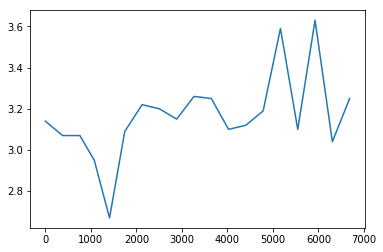

In [47]:
# Plot of average number of cards given per game

import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(yellows_df['YellowsPerGame'])



In [48]:
yellows_df['YellowsPerGame'].mean()

3.162631578947368

The average cards per game so far this seaason is 3.25 which is the 4th highest from the 19 seasons we have. The average for all seasons is 3.16 so it might be that there are slightly more cards being given out now than before. This assumes that cards will be given out at the same rate for the remainder of the season which could be wrong. More players will already be on yellow cards at this point so we might see a decrease in cards as players try to avoid suspension.

While the card numbers are similar between season 00/01 and this year I would say from my own knowledge that football has changed in the last 20 years and what warrants a yellow card is different now than it was then. The fact that we haven't seen a significant increase shows that players behaviour has adjusted to what they can get away with.

3. Which referees would you describe as the most lenient? Why?

Relevant columns - referee, home/away yellows/reds/fouls

Depends on definition of leniency

Referees who give out less cards per game

Referees who give less fouls per game

Referees who wait longer to give out cards, so high fouls per game with low cards per game.



In [50]:
# Investigate referee column - 109 referees, but some duplicates can be seen eg M Atkinson and Mn Atkinson

data['referee'].value_counts()

M Dean                431
M Atkinson            365
A Marriner            301
P Dowd                295
H Webb                294
M Clattenburg         291
C Foy                 254
L Mason               254
M Oliver              223
M Halsey              217
A Taylor              214
M Jones               202
A Wiley               198
S Bennett             195
K Friend              193
J Moss                190
L Probert             175
R Styles              169
P Walton              168
M Riley               162
N Swarbrick           132
G Poll                130
C Pawson              125
U Rennie               94
R Madley               91
R East                 87
S Attwell              87
D Gallagher            78
N Barry                53
S Dunn                 51
                     ... 
Rob Harris             11
B. Knight              11
E. K. Wolstenholme     11
D. Pugh                 9
Clive Wilkes            9
E Wolstenholme          8
D Coote                 8
S Hooper    

In [51]:
# Extract only the last name from referee column and store in a new column(what if they have same last name? typos?)


def ref_surname(ref):
    lastname = ref.rsplit(None,1)[1]
    return lastname

data['ref_name'] = data.apply(lambda x: ref_surname(x['referee']), axis=1)

In [53]:
#Check for typos

data['ref_name'].value_counts()

Dean            463
Atkinson        367
Marriner        301
Dowd            300
Webb            294
Clattenburg     291
Foy             259
Halsey          254
Mason           254
Wiley           244
Bennett         233
Jones           231
Taylor          226
Oliver          223
Styles          203
Riley           198
Friend          193
Moss            190
Poll            177
Probert         175
Walton          168
Swarbrick       132
Pawson          125
Gallagher       116
Rennie          110
Madley           93
D'Urso           93
Dunn             89
East             87
Barry            87
Attwell          87
Durkin           83
Barber           75
Winter           75
Knight           59
Elleray          52
Tierney          47
Scott            42
Messias          41
Kavanagh         31
Wilkes           28
Tanner           26
Wolstenholme     19
Lodge            18
Stroud           17
Pugh             14
Harris           12
Coote             8
Hooper            7
Crossley          2


In [54]:
### Apply function to calculate referee stats. Number of games, yellows per game, reds per game, fouls per game
### foul to card ratio

def ref_leniency(df,ref):
    
    ref_data = df[df['ref_name']==ref]
    
    games = len(ref_data)
    
    home_yellows = ref_data['home_yellow_cards'].sum()
    away_yellows = ref_data['away_yellow_cards'].sum()
    total_yellows = home_yellows + away_yellows
    
    yellow_pg = total_yellows / games
    
    home_reds = ref_data['home_red_cards'].sum()
    away_reds = ref_data['away_red_cards'].sum()
    total_reds = home_reds + away_reds
    
    red_pg = total_reds / games
    
    
    home_fouls = ref_data['home_fouls'].sum()
    away_fouls = ref_data['away_fouls'].sum()
    total_fouls = home_fouls + away_fouls
    
    fouls_pg = total_fouls / games
    
    foul_card_ratio = round(total_fouls / total_yellows, 2)
    
    return ref, games, yellow_pg, red_pg, fouls_pg, foul_card_ratio

In [55]:
# Get list of referee names

refs = data['ref_name'].values.tolist()

In [56]:
# Loop through each referee and calculate stats

leniency_df = []

for name in refs:
    
    leniency_df.append(ref_leniency(data,name))

In [57]:
# Create dataframe of referee stats to compare them

ref_df = pd.DataFrame(leniency_df, columns = ["Ref",'Games','Yellows_per_game','Reds_per_game','Fouls_per_game', 'Fouls_per_card'])

In [58]:
# Filter by refs that have done at least 10 games

common_refs = ref_df[ref_df['Games']>10]

In [64]:
# Look at top 5 charts for each leniency measure to see if there are any names that come up frequently

In [60]:
common_refs.sort_values(by='Fouls_per_game').drop_duplicates().head()

,Ref,Games,Yellows_per_game,Reds_per_game,Fouls_per_game,Fouls_per_card
6589,Kavanagh,31,3.354839,0.096774,20.129032,6.00
6517,Scott,42,2.666667,0.142857,20.714286,7.77
3582,Attwell,87,3.413793,0.137931,20.735632,6.07
4621,Swarbrick,132,3.333333,0.083333,20.924242,6.28
2733,Probert,175,2.542857,0.171429,21.257143,8.36


In [61]:
common_refs.sort_values(by='Yellows_per_game').drop_duplicates().head()

,Ref,Games,Yellows_per_game,Reds_per_game,Fouls_per_game,Fouls_per_card
1584,Halsey,254,2.153543,0.106299,22.244094,10.33
1068,Durkin,83,2.192771,0.084337,24.939759,11.37
644,Winter,75,2.480000,0.080000,24.720000,9.97
3343,Probert,175,2.542857,0.171429,21.257143,8.36
966,Gallagher,116,2.560345,0.189655,24.448276,9.55


In [62]:
common_refs.sort_values(by='Reds_per_game').drop_duplicates().head()

,Ref,Games,Yellows_per_game,Reds_per_game,Fouls_per_game,Fouls_per_card
272,Lodge,18,2.888889,0.055556,24.777778,8.58
2729,Stroud,17,2.941176,0.058824,28.176471,9.58
6276,Tierney,47,3.042553,0.063830,22.234043,7.31
782,Pugh,14,2.785714,0.071429,24.214286,8.69
427,Winter,75,2.480000,0.080000,24.720000,9.97


In [63]:
common_refs.sort_values(by='Fouls_per_card',ascending=False).drop_duplicates().head()

,Ref,Games,Yellows_per_game,Reds_per_game,Fouls_per_game,Fouls_per_card
120,Durkin,83,2.192771,0.084337,24.939759,11.37
2359,Rennie,110,2.627273,0.081818,27.518182,10.47
1544,Halsey,254,2.153543,0.106299,22.244094,10.33
109,Winter,75,2.480000,0.080000,24.720000,9.97
2418,Stroud,17,2.941176,0.058824,28.176471,9.58


From this overview we see that Durkin and Halsey are top 2 for fewest yellows per game and 1,3 for fouls per card. These would be my two candidates for most lenient refs with Durkin taking the title given he's almost a whole foul ahead on fouls per card.



We could also look at averages for each stat to see how far from the norm some of these refs are

In [65]:
common_refs.describe()

,Games,Yellows_per_game,Reds_per_game,Fouls_per_game,Fouls_per_card
count,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000
mean,224.436975,3.166184,0.158505,23.564619,7.559962
std,105.617565,0.377959,0.046557,2.085742,1.204797
min,12.000000,2.153543,0.055556,20.129032,6.000000
25%,168.000000,3.057377,0.129870,22.244094,6.630000
50%,231.000000,3.262458,0.157895,22.779698,7.190000
75%,291.000000,3.400545,0.189655,24.730769,8.210000
max,463.000000,3.797980,0.288136,29.333333,11.370000


From this we can see that Halsey and Durkin are a whole yellow card below the mean which confirms they are exceptionally lenient on this measure.  They are also way above the top 75% range for fouls per card.  They are close to average in terms of fouls per game and in the bottom 25% for red cards given. I'd argue quite strongly that they are the two most lenient referees.  There isn't nearly as much range in the fouls per game stat so I don't see any other candidates who stand out.

In [66]:
# Check when they operated

data[data['ref_name']=='Halsey']['season'].value_counts()

809     27
607     26
708     24
506     21
1011    21
102     21
1112    21
405     20
203     19
304     19
1213    18
1       16
910      1
Name: season, dtype: int64

In [67]:
data[data['ref_name']=='Durkin']['season'].value_counts()

1      22
102    21
304    21
203    19
Name: season, dtype: int64

Executive Summary

We can see that the foul rate for the highest fouling team has seen a decrease over the last 19 seasons from Sunderlands peak of 16.26 to the last 10 seasons highest all being under 14.

The number of yellow cards given per season has increased slightly this season if our assumption of card rate being the same in the latter part of the seaon holds.  One factor in this increase could be the new rule around what yellow cards count towards a suspension. In previous seasons cards from all competitions counted towards a suspension whereas this year only cards received in the premier league count towards a premier league suspension.  This might lessen the effect of my earlier argument that we would see fewer cards in the latter stages of the season as players try to avoid suspension.  

We have also seen the retirement of by far the two most lenient referees who combined were in charge of 387 games, 327 of which were before 2010 and the last of which was in the 12/13 season.  

All of these combined suggest that football has become stricter with less fouls and more of those fouls earning a yellow card.

